# 1.토큰화 (Tokenization)

  - 토큰: 의미있는 단위로 정의

###1) 단어 토큰화 (Word Tokenization)
  - 토큰의 기준이 단어인 경우
  - '단어'는 단어구, 의미를 갖는 문자열로 간주되기도 함

* 예시: 구두점 제거
  - 마침표, 컴마, 물음표, 세미콜론, 느낌표
  - 입력: Time is an illusion. Lunchtime double so!
  - 출력: "Time", "is", "an", "illustion", "Lunchtime", "double", "so"
  - 구두점을 지운 뒤, whitespace 기준으로 슬라이싱

###2) 토큰화 중 생기는 선택의 순간

* 예시: 아포스트로피
  - Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.
  - Don't의 토큰화: Don't / Don t / Dont / Do n't
  - Jone's의 토큰화: Jone's / Jone s / Jone / Jones

* 유저가 원하는 결과가 나오도록 직접 설계하거나, 기존 도구 사용
  - NLTK: word_tokenize / WordPunctTokenizer


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# word_tokenize
print('단어 토큰화1: ',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화1:  ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


> Don't: Do / n't

> Jone's: Jone / 's

In [ ]:
# WordPunctTokenizer
print('단어 토큰화2:', WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화2: ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


> 주로 단순한 구두점 처리와 단어 분리를 합니다. 보다 기본적인 접근 방식입니다.

> Don't: Don / ' / t

> Jone's: Jone / ' / s

In [ ]:
# keras의 text_to_word_sequence
print('단어 토큰화3: ',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

단어 토큰화3:  ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


> 모든 알파벳을 소문자 변환하고, 구두점 제거 but 아포스트로피 보존

> Don't: don't

> Jone's: jone's

###3) 토큰화 고려 사항

* 구두점 및 특수 문자를 단순 제외해서는 안 된다
  - 마침표의 경우 문장 경계를 파악하는데 도움되므로, 단어를 뽑아낼 때 마침표 제외하지 않을 수 있음
  - Ph.D, AT&T, $45, 45.55, 24/02/21 등
  
  - $100,000,000의 컴마


* 줄임말과 단어 내 띄어쓰기 있는 경우도 고려해야 한다
  - 아포스트로피의 단어 압축: what're > what are
  - New York / Rock n Roll: 하나의 단어이지만 중간에 띄어쓰기 존재

표준 토큰화 예제: Penn Treebank Tokenization의 규칙

> 규칙1. - (하이픈)으로 구성된 단어는 하나로 유지

> 규칙2. doen't와 같이 아포스트피로 '접어'가 함께하는 단어는 분리


In [ ]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."

print('Treebank WordTokenizer:',tokenizer.tokenize(text))

Treebank WordTokenizer: ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


###4) 문장 토큰화 (Sentence Tokenization)

* 문장 분류 (sentence segmentation)이라고도 부름
* 문장 부호를 기준으로 문장을 토큰화하면 되지 않을까?
  -  느낌표와 물음표: 문장 구분을 위한 명확한 구분자(boundary) 역할 수행
  - 마침표: 문장이 끝이 아니더라도 등장 가능
  -ex1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 aaa@gmail.com로 결과 좀 보내줘. 그 후 점심 먹으러 가자.
  - ex2)  Since I'm actively looking for Ph.D. students, I get the same question a dozen times every year.
* NLTK에서는 영어 문장의 토큰화를 수행하는 sent_tokenize 지원
* 한국어 문장 토큰화 도구: KSS(Korean Sentence Splitter)



In [ ]:
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [ ]:
# 문장 중간에 마침표가 다수 등장하는 경우
text2= "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text2))

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [ ]:
pip install kss

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 24.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.3/131.3 kB 641.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.2/682.2 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# 한국어 문장 토큰화
import kss
text3= '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text3))

한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


###5) 한국어 토큰화의 어려움

* 영어의 경우 예외처리를 잘 한다면 띄어쓰기만으로 토큰화 가능
  - 보통 단어 단위로 띄어쓰기가 이루어지기 때문
* 한국어의 경우 띄어쓰기 단위가 '어절'로 토큰화하는 어절 토큰화를 지양
  - 한국어는 교착어이기 때문
  - 교착어: 어근과 접사에 의해 단어의 의미가 결정됨
  - 어절: 띄어쓰기의 단위가 됨
* 교착어의 특성
  - '그' + '에게', '를', '와' 등 다양한 조사가 띄어쓰기 없이 붙는다
  - 같은 단어임에도 서로 다른 조사가 붙어 다른 단어로 인식되는 경우가 많음
  - 이로 인해 한국어 NLP에서는 조사를 분리해 주어야 함
  - 형태소: 뜻을 가진 가장 작은 말의 단위
      - 자립 형태소: 그 자체로 단어가 되는 형태소 >> 체언, 수식언, 감탄사
      - 의존 형태소: 다른 형태소와 결합되어 사용되는 형태소 >> 접사, 어미, 조사, 어간
      - e.g. 에디가 책을 읽었다
      - 자립 형태소(에디, 책) / 의존 형태소(가, 을, 읽, 었, 다)
  - 한국어 NLP에서는 어절 토큰화가 아닌, **형태소 토큰화**를 해주어야 한다!
* 한국어는 띄어쓰기가 (영어보다) 잘 지켜지지 않음
  - 띄어쓰기를 하는 게 어려움
  - 영어에 비해 띄어쓰기를 안해도 이해가 쉬움
    - EX1) 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.
    - EX2) Tobeornottobethatisthequestion
  - 한국어(모아쓰기) vs 영어(풀어쓰기)

###6) 품사 태깅 (Park-of-speech tagging)

* 단어의 의미를 제대로 파악하기 위해서는 해당 단어가 어떤 품사로 쓰였는지 보는 것이 주요 지표가 될 수도 있음
* 그에 따라 단어 토큰화 과정에서 각 단어가 어떤 품사로 쓰였는지를 구분해놓기도 하는데, 이 작업을 품사 태깅(part-of-speech tagging)이라고 함
* NLTK와 KoNLPy를 통해 품사 태깅 실습을 진행

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# NLTK에서는 Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅하여 토큰화
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화:',tokenized_sentence)
print('품사 태깅:',pos_tag(tokenized_sentence))

단어 토큰화: ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅: [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


* 토큰화를 수행한 결과를 입력으로 품사 태깅 수행
  - PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 22.3 MB/s eta 0:00:00


> 각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 된다
>> 예를 들어서 속도를 중시한다면 메캅을 사용

In [ ]:
# 한국어 자연어 처리를 위해 KoNLPy(코엔엘파이)
# 형태소 분석기: Okt(Open Korea text), Mecab(메캅), Komoran(코모란), Hannanum(한나눔), Kkma(꼬꼬마)
# 한국어 형태소 분석기를 사용하여 단어 토큰화(정확히는 형태소 토큰화) 수행

from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석:',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅:',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출:',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

print("꼬꼬마 형태소 분석:",kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 품사 태깅:",kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print("꼬꼬마 명사 추출:",kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

"""
1) morphs : 형태소 추출
2) pos : 품사 태깅(Part-of-speech tagging)
3) nouns : 명사 추출
"""

OKT 형태소 분석: ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅: [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출: ['코딩', '당신', '연휴', '여행']
꼬꼬마 형태소 분석: ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅: [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출: ['코딩', '당신', '연휴', '여행']


# 2.정제와 정규화 (Cleaning & Normalization)

* 토큰화: 코퍼스에서 용도에 맞게 토큰 분류
* 토큰화 작업 전, 후에는 텍스트 데이터를 용도에 맞게 정제하고 정규화
  - 정제: 갖고 있는 코퍼스로부터 노이즈 데이터 제거 (토큰화 작업에 방해되는 부분 배제)
  - 정규화: 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만든다

###1) 규칙에 기반하여 표기가 다른 단어들을 통합
* 정규화 규칙의 예: 같은 의미를 갖고 있음에도, 표기가 다른 단어들 >> 하나의 단어로 정규화
  - USA와 US / uh-huh와 uhhuh
  - 정규화를 거치면 US를 찾으면 USA를 함께 발견 가능

###2)대소문자 통합

* 주로 대문자를 소문자로!
  - 대문자는 문장 맨 앞과 같은 특정 상황에서만 사용하기 때문
* Automobile에 소문자 변환을 사용하면, automobile을 찾는 질의(query)의 결과로 Automobile도 찾을 수 있다!
* 주의: 무작정 통합 X
  - '미국 US'와 '우리 us' 구분
  - 회사 이름(General Motors)
  - 사람 이름(Bush)
* 해결방안: 일부만 소문자 변환
  - 규칙 예시: 문장의 맨 앞에 나오는 단어의 대문자만 소문자 변환
* 사용자가 대소문자를 구분하지 않고 입력한다면, 예외 사항을 크게 고려하지 않고 모든 코퍼스를 소문자로 바꾸는 것이 종종 더 실용적 해결책

###3)필요한 단어 제거

* 노이즈 데이터
  - 자연어가 아니면서 아무 의미도 갖지 않는 글자
  - 분석하고자 하는 목적에 맞지 않는 불필요 단어 ex) 불용어, 등장 빈도가 적은 단어 등




1. 등장 빈도가 적은 단어
  - 스팸 메일 분류기: 100,000개의 메일 데이터에서 5번 등장한 단어 >> 분류에 거의 도움되지 않음

2. 길이가 짧은 단어
  - 영어권: 짧은 단어 삭제는 자연어 처리에서 크게 의미 없는 단어를 제거하는 어느정도의 효과
    - 길이가 짧은 단어를 삭제하면서 단어가 아닌 구두점들까지도 한번에 제거하는 효과 존재
    - 예시: 길이가 1인 단어 제거
      - 자연어 처리에서 의미를 갖지 못하는 단어인 관사 'a'와 주어로 쓰이는 'I' 제거

  - 한국어: 크게 유효하지 않을 수 있음
    - 한국어 단어의 평균 길이(2-3)는 영어 단어의 평균 길이(6-7)보다 짧다
    


In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('',text))

 was wondering anyone out there could enlighten this car.


In [ ]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

shortword = re.compile(r'\W*\b\w{2,3}\b')
print(shortword.sub('',text))

I wondering anyone there could enlighten this.


###4) 정규 표현식(Regular Expression)

* 얻어낸 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면, 정규 표현식을 통해 이를 제거
  - HTML 문서로부터 가져온 코퍼스라면, HTML 태그
  - 뉴스 기사 크롤링했다면, 기사마다 게재 시간
  - 이처럼, 정규 표현식은 코퍼스 내에서 계속 등장하는 글자들을 규칙에 기반하여 한번에 제거

#3.어간 추출과 표제어 추출 (Stemming & Lemmatization)

> 정규화의 목적: 코퍼스로부터 복잡성을 줄이는 것

> 어간 추출과 표제어 추출: 정규화 기법 중 코퍼스에 있는 단어 개수를 줄일 수 있는 기법


> 아이디어: 겉으로는 서로 다른 단어들이지만, (하나의 단어로 일반화시킬 수 있다면) 일반화시켜 문서 내 단어 수를 줄인다!

> 단어의 빈도수를 기반으로 문제를 폴고자하는 BoW(Bag of Words) 표현을 사용하는 자연어 처리 문제에서 주로 사용

> 표제어 추출은 문맥을 고려하여 수행했을 때 해당 단어의 품사 정보를 ㅂ조ㅗㄴ

> 어간 추출은 품사 정보가 보존되지 않는다!
>> 어간 추출의 결과는 사전에 등재되어 있지 않는 단어인 경우가 많기 때문

###1) 표제어 추출 (Lemmatization)
* 표제어: '기본 사전형 단어'
  - are, am, is의 표제어는 'be'
  - 단어들이 다른 형태를 가지더라도, 그 뿌리 단어를 찾아가서 단어의 개수를 줄이고자 함
  - 섬세한 표제어 추출 방법: 형태학적 파싱을 먼저 진행 (형태소의 종류인 어간과 접사로 분리하는 과정)
    - 어간(stem): 단어의 의미를 담고 있는 핵심 부분
    - 접사(affix): 단어에 추가적 의미를 주는 부분
    - ex) cats = cat(stem) + s(affix)
  - NLTK의 WordNetLemmatizer


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전:',words)
print('표제어 추출 후:',lemmatizer.lemmatize(words))

표제어 추출 전: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']


TypeError: unhashable type: 'list'

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전:',words)
print('표제어 추출 후:',[lemmatizer.lemmatize(word) for word in words])

표제어 추출 전: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후: ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


> 리스트 컴프리헨션: [표현식 for 변수 in 반복할_리스트]

numbers = [1, 2, 3, 4, 5]
squared_numbers = [number * 2 for number in numbers]



> 표제어 추출 결과가 완벽하진 않음

> 표제어 추출기(Lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있음!

> WordNetLemmatizer에서는 입력으로 단어의 품사 제공 가능

In [ ]:
lemmatizer.lemmatize('dies','v')

'die'

In [ ]:
lemmatizer.lemmatize('watched','v')

'watch'

In [ ]:
lemmatizer.lemmatize('has','v')

'have'

###2) 어간 추출 (Stemming)

> 어간을 추출하는 작업으로, 형태학적 분석을 단순화한 것

> 규칙기반 접근: 정해진 규칙만 보고 단어의 어미를 자르는, 섬세하지 않은 작업

> NLTK에서 지원하는 어간 추출 알고리즘: Porter Algorithm
>> 정밀하게 설계되어 정확도가 높음!

> 일반적으로, 어간 추출 속도는 표제어 추출 속도보다 빠르다



In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### PorterSemmer

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()
#PorterStemmer()에서 ()는 객체를 생성하기 위해 사용됩니다. PorterStemmer는 클래스이고, ()를 사용하면 그 클래스의 인스턴스(객체)가 생성됩니다.
#이 객체를 통해 클래스에 정의된 메서드와 속성을 사용할 수 있습니다.

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전: ',tokenized_sentence)
print('어간 추출 후: ', [stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전:  ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후:  ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


규칙: ALIZE >> AL / ANCE >> 삭제 / ICAL >> IC

formalzize >> formal

In [ ]:
words = ['formalize','allowance','electrical']
print('어간 추출 전:',words)
print('어간 추출 후:',[stemmer.stem(word) for word in words])

어간 추출 전: ['formalize', 'allowance', 'electrical']
어간 추출 후: ['formal', 'allow', 'electr']


#### Lancaster Stemmer(랭커스터 스테머)

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lan_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:', [porter_stemmer.stem(word) for word in words])
print('랭커 스테머의 어간 추출 후:', [lan_stemmer.stem(word) for word in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


> 두 stemmer 알고리즘은 서로 다른 결과
>> 이미 알려진 알고리즘을 사용할 때는, 사용하고자 하는 코퍼스에 스테머 적용해보고, 어떤 스테머가 적합한지 판단 후 사용

> 규칙에 기반한 알고리즘이 일반화를 잘 수행하지 못하는 경우
>> organization의 어간 추출 결과 organ / organ의 어간 추출 결과 organ
>>> 서로 다른 두 단어에 대해 동일한 어간 추출 결과
>>>> **의미가 동일한 경우에만 같은 단어를 얻기를 원하는 정규화의 목적에 맞지 않음!**

###3) 한국어에서의 어간 추출

> 5언 9품사의 구조

> 용언(동사, 형용사)는 어간(stem)과 어미(ending)의 결합으로 구성!

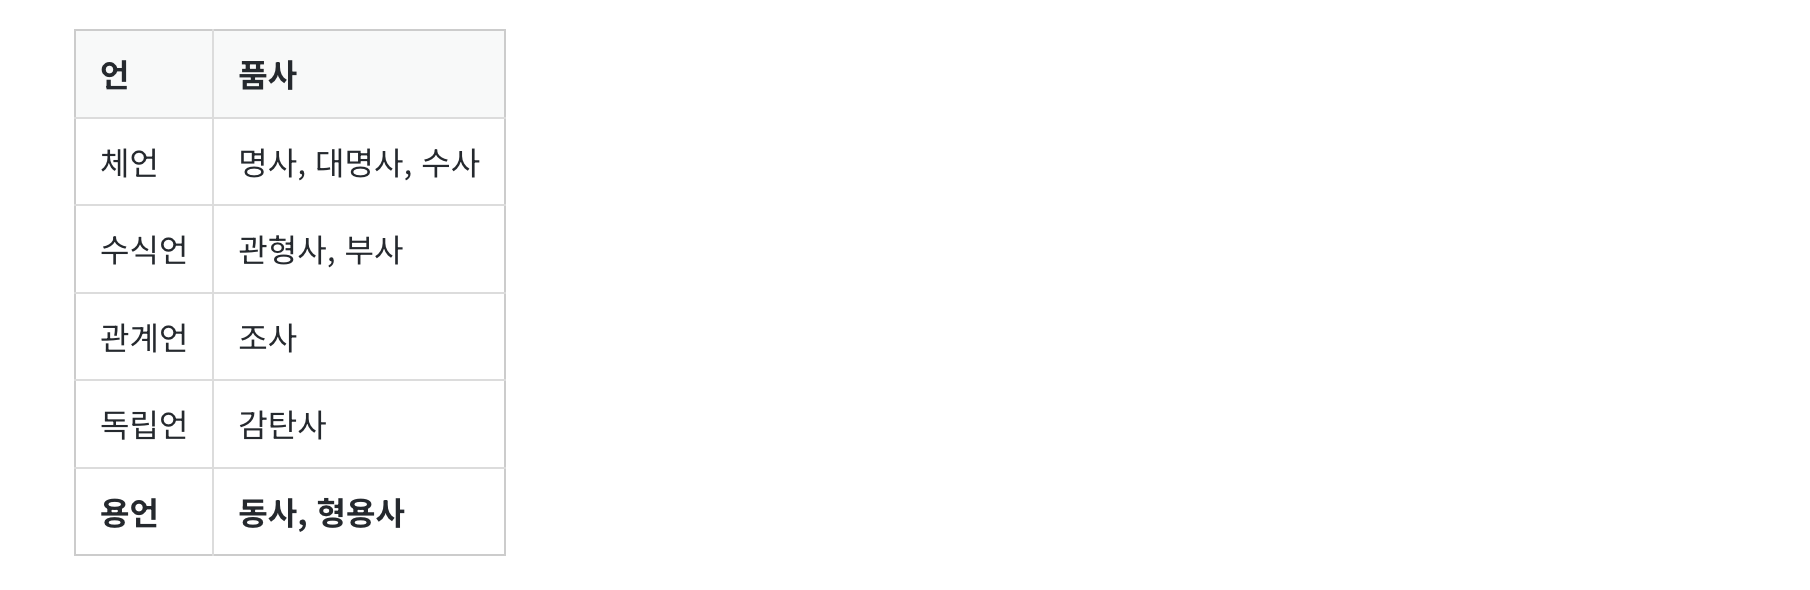

1. 활용(conjugation)
  * 활용: (용언의) 어간이 어미를 가지는 일
    - stem: 용언을 활용할 때, 모양이 변하지 않는 부분 (바뀌기도 한다! 긋다, 그어라)
    - ending: 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분

2. 규칙 활용
  * 어간이, 어미가 붙기 전의 모습과 어미가 붙은 후의 모습이 같다!
  * 규칙 기반으로 어미를 단순 분리해주면 어간 추출 완료!
      - 잡다: 잡(어간) + 다(어미)

3. 불규칙 활용
  * 어간이 어미를 취할 때 어간의 모습이 바뀌거나: 오르+아 >> 올라
  * 취하는 어미가 특수한 어미인 경우: 푸르+아 >> 푸르러

# 4.불용어(StopWord)
* 불용어: 자주 등장하지만 분석하는 것에 큰 도움이 되지 않는 단어
* 갖고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는, 큰 의미가 없는 단어 토큰(불용어)를 제거해야 함
* NLTK에서는 100개 이상의 영어 단어를 불용어로 정의

###1) NLTK에서 불용어 확인하기

In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.3 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from konlpy.tag import Okt

stop_words_list = stopwords.words('english')
print("불용어 개수:",len(stop_words_list))
print("불용어 10개 출력:",stop_words_list[:10])

불용어 개수: 179
불용어 10개 출력: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


###2) NLTK를 통해 불용어 제거

In [ ]:
stop_words_list[:5]

['i', 'me', 'my', 'myself', 'we']

In [ ]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(example)

result = []
for word in word_tokens:
  if word not in stop_words:
    result.append(word)

print('불용어 제거 전:',word_tokens)
print('불용어 제거 후:',result)

불용어 제거 전: ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후: ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


###3) 한국어에서 불용어 제거

> 간단한 방법: 토큰화 후에 조사, 접속사 제거

> 명사, 형용사와 같은 단어 중 불용어로서 제거하고 싶다면?
>> 사용자가 직접 불용어를 정의하여 불용어 사전을 만들게 되는 경우가 많음!

In [ ]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전:',word_tokens)
print('불용어 제거 후:',result)

불용어 제거 전: ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후: ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


# 5.정규 표현식 (Regular Expression)

> 정규 표현식은 문자열에서 특정 패턴을 검색하고 조작하는 데 사용되는 규칙 집합

###1) 정규 표현식 문법과 모듈 함수

> 정규표현식 문법

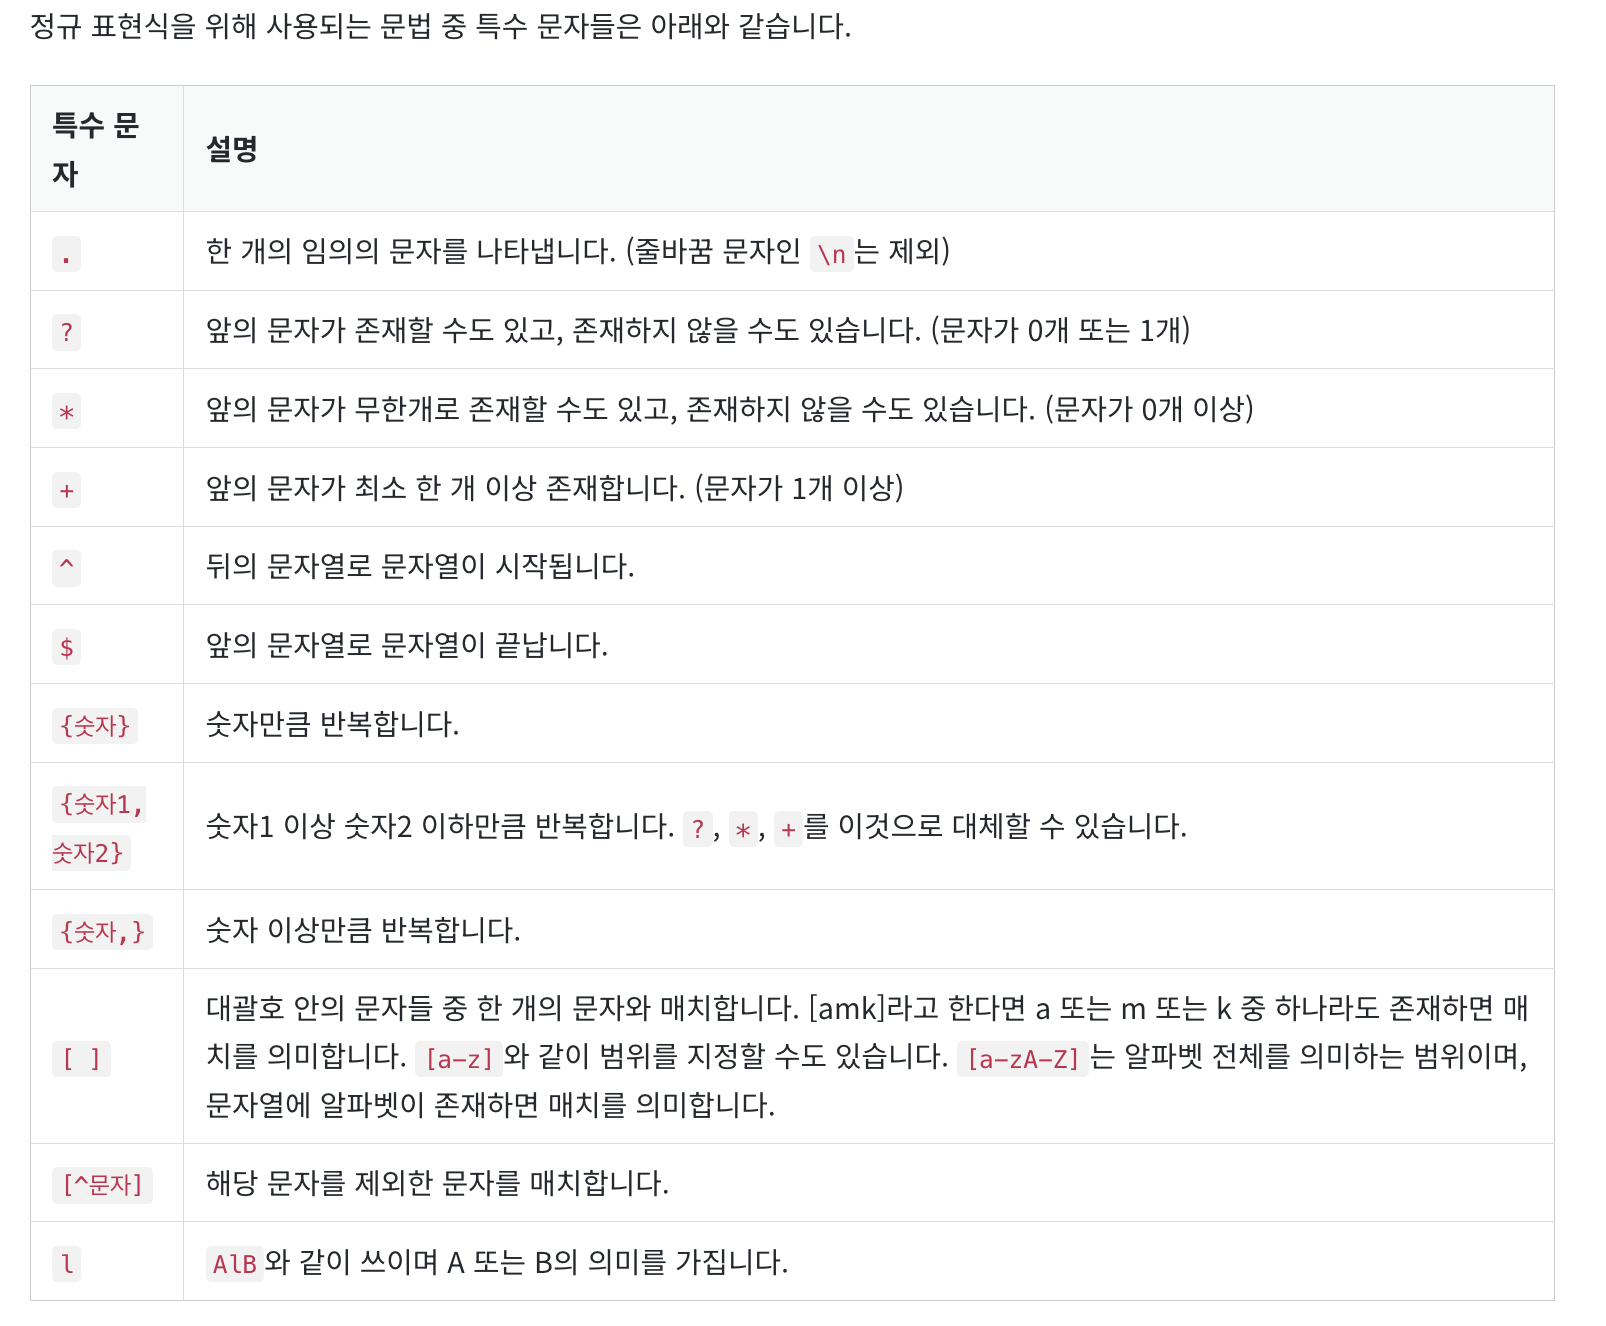

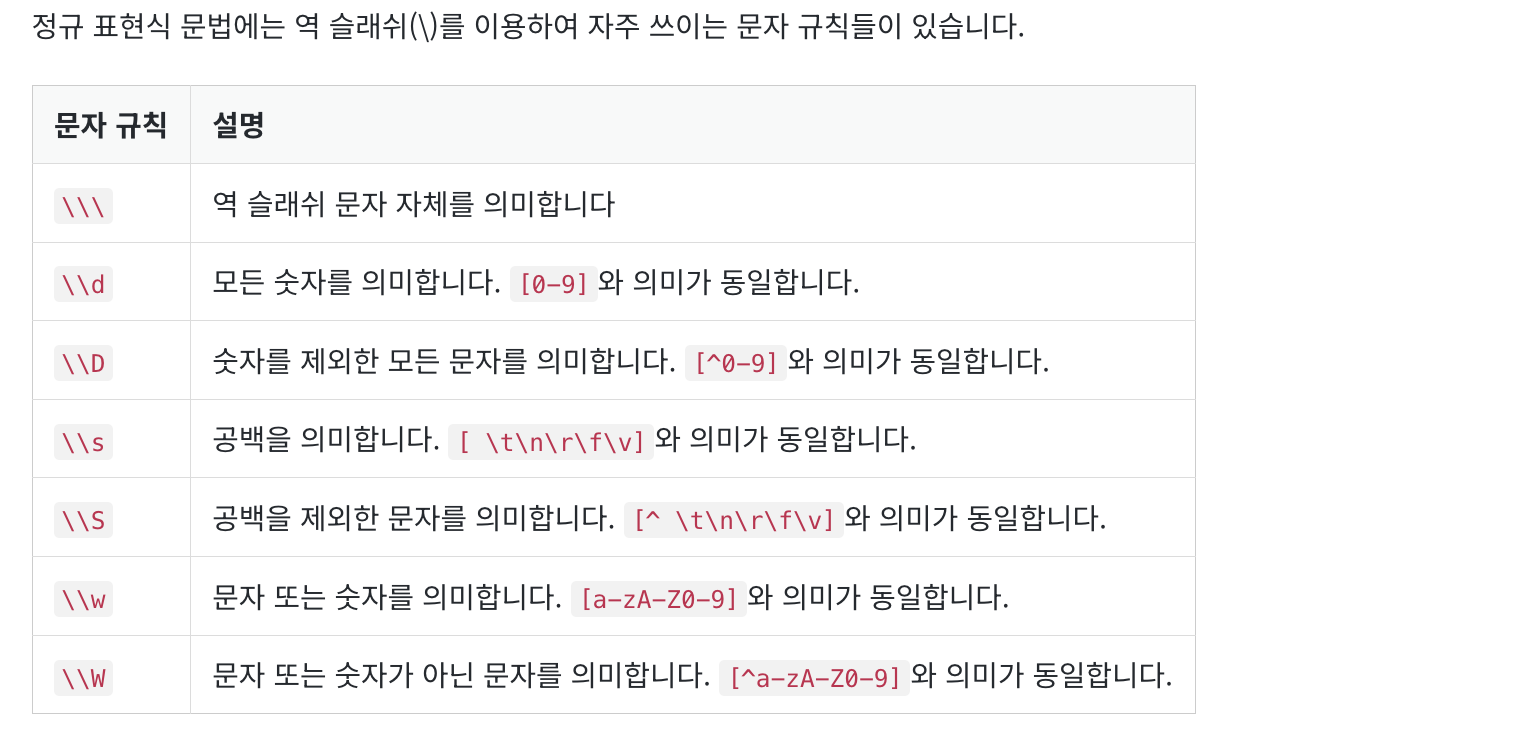

> 정규표현식 모듈 함수

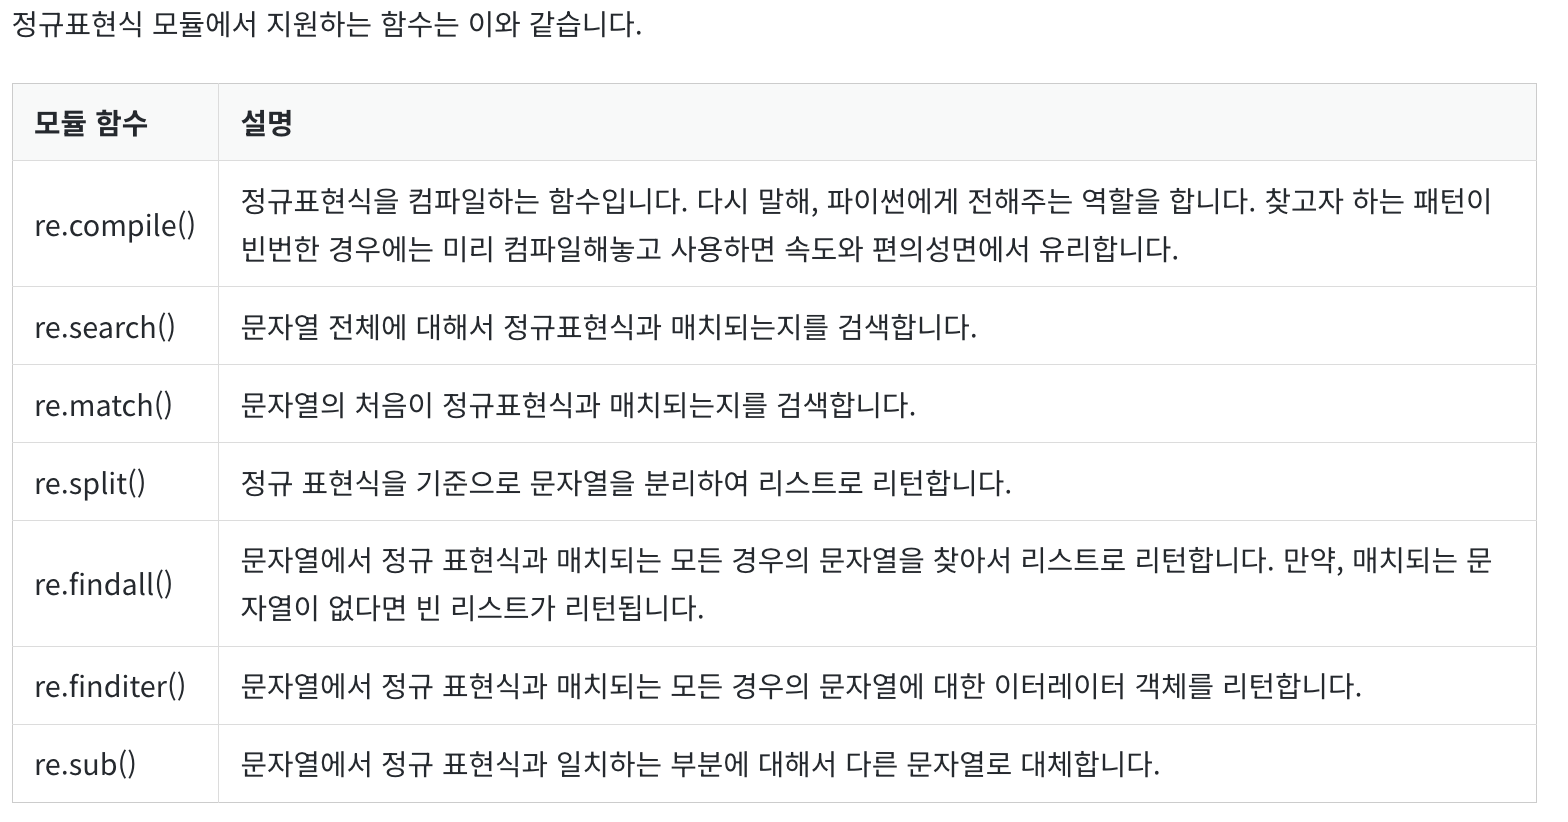

###2) 정규 표현식 실습

In [ ]:
import re

In [ ]:
# . 기호: 한 개의 임의의 문자!
# 정규 표현식 'a.c': abc, adc, a!c 모두 가능

r1 = re.compile('a.c')
r1.search('kkk') #아무런 결과도 출력 X
r1.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
# ? 기호: 앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있음
# 정규 표현식 'ab?c': ab, abc 모두 가능

r2 = re.compile('ab?c')
print(r2.search('abbc'))
print(r2.search('ac'))
print(r2.search('abc'))

None
<re.Match object; span=(0, 2), match='ac'>
<re.Match object; span=(0, 3), match='abc'>


In [ ]:
# * 기호: 바로 앞의 문자가 0개 이상일 경우 (존재하지 않거나, 여러 개)
# 정규 표현식 'ab*c': ac,abc,abbc, abbbc ... b는 무수히 많을 수 있음

r3 = re.compile('ab*c')
print(r3.search('a'))
print(r3.search('ac'))
print(r3.search('abbbbbc'))

None
<re.Match object; span=(0, 2), match='ac'>
<re.Match object; span=(0, 7), match='abbbbbc'>


In [ ]:
# + 기호: *와 유사하지만, 바로 앞의 문자가 1개 이상이어야 함
# 정규 표현식 'ab+c': ac는 불가

r4 = re.compile('ab+c')
print(r4.search('ac'))
print(r4.search('abbbbbbbbc-abc'))

None
<re.Match object; span=(0, 10), match='abbbbbbbbc'>


In [ ]:
# ^ 기호: 시작되는 문자열 지정
# ^ab: ab로 시작되는 경우 매치

r5 = re.compile('^ab')
print(r5.search('bbc'))
print(r5.search('zab'))
print(r5.search('abbbbc'))

None
None
<re.Match object; span=(0, 2), match='ab'>


In [ ]:
# {숫자} 기호: 해당 문자를 숫자만큼 반복
# ab{2}c: abbc

r6 = re.compile('ab{2}c')
print(r6.search('aabbbbc'))
print(r6.search('abbc'))

None
<re.Match object; span=(0, 4), match='abbc'>


In [ ]:
# {숫자,} 기호: 해당 문자를 숫자 이상만큼 반복
r7 = re.compile('a{2,}bc')
print(r7.search('bc'))
print(r7.search('aaaabc'))

None
<re.Match object; span=(0, 6), match='aaaabc'>


In [ ]:
# [] 기호: 그 문자들 중 한 개의 문자와 매치
# [abc]: a, b, c가 들어가 있는 문자열과 매치
# 범위 지정
  #[a-zA-Z]: 알파벳 전부
  #[0-9]: 숫자 전부

r8 = re.compile('[a-c]')
print(r8.search('zzz'))
print(r8.search('a'))
print(r8.search('cab2222'))

None
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='c'>


In [ ]:
# [^문자] 기호: 해당 문자를 제외한 모든 문자를 매치하는 역할
# [^abc]: a, b, c를 제외한 모든 문자열 매치

r10 = re.compile('[^abc]')

print(r10.search('a'))
print(r10.search('ab'))
print(r10.search('d'))
print(r10.search('1'))

None
None
<re.Match object; span=(0, 1), match='d'>
<re.Match object; span=(0, 1), match='1'>


###3) 정규 표현식 모듈 함수 예제

#### re.match()와 re.search()의 차이
  - search(): 정규 표현식 전체에 대해 문자열이 매치하는지 확인
  - match(): 문자열의 첫 부분부터 정규 표현식과 매치하는지 확인


In [ ]:
r = re.compile('ab.')
print(r.match('kkkabc'))
print(r.search(('kkkabc')))

None
<re.Match object; span=(3, 6), match='abc'>


#### re.split()
> (입력된 정규 표현식)을 기준으로 문자열을 분리하여 리스트로 리턴 >> 토큰화 가능!

In [ ]:
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(' ',text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [ ]:
# '+' 기준 분리
text = '사과+딸기+수박+바나나+메론'
#특수 문자를 문자 그대로 사용하려면 이스케이프 해야함

['사과', '딸기', '수박', '바나나', '메론']

#### re.findall()

> 정규 표현식과 매치되는 모든 문자열을 리스트로 리턴

> 매치되는 문자열이 없다면 빈 리스트를 리턴

In [ ]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

print(re.findall('\d+',text))
print(re.findall(']d+','문자열입니다'))


['010', '1234', '1234', '30']
[]


#### re.sub()

> 정규 표현식 패턴과 일치하는 문자열을 찾아 다른 문자열로 대체

> 영어 문장에 각주 등의 이유로 특수 문자가 많은 경우 공백으로 대체하여 제거

In [ ]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
preprocessed_text2 = re.sub(' +',' ',preprocessed_text)
print(preprocessed_text)
print(preprocessed_text2)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 
Regular expression A regular expression regex or regexp sometimes called a rational expression is in theoretical computer science and formal language theory a sequence of characters that define a search pattern 


###4) 정규 표현식 텍스트 전처리 예제

> \s+는 공백을 찾아내는 정규표현식
>> 뒤에 붙는 +는 최소 1개 이상의 패턴을 찾아낸다는 의미
>>> s는 공백을 의미하기 때문에 최소 1개 이상의 공백인 패턴을 찾아냄


split은 주어진 정규표현식을 기준으로 분리하므로 결과는 아래와 같음

In [ ]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

# 공백 기준 값 분리
re.split('\s+',text)

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [ ]:
print(re.findall('\d+',text))
print(re.search('\d+',text)) # 첫 번째 숫자 뭉치만 반환

['100', '101', '102']
<re.Match object; span=(0, 3), match='100'>


In [ ]:
#대문자인 행의 값만 가져오고 싶음!
print(re.findall('[A-Z]',text))
print(re.findall('[A-Z]+',text))

#대문자가 연속 4번
print(re.findall('[A-Z]{4}',text))

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']
['J', 'PROF', 'J', 'STUD', 'M', 'STUD']
['PROF', 'STUD', 'STUD']


In [ ]:
# 이름에 대한 행의 값을 가져오고 싶다
# 처음에 대문자, 나머지 소문자
re.findall('[A-Z][a-z]+', text)

['John', 'James', 'Mac']

###5) 정규 표현식을 이용한 토큰화

* RegexpTokenizer (Regular Expression Tokenizer)
  - 괄호 안에 하나의 토큰으로 규정하기를 원하는 정규 표현식을 넣어서 토큰화 수행

In [ ]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

#(알파벳) 문자 또는 숫자 하나 이상
tokenizer1 = RegexpTokenizer('\w+')
# 정규 표현식(알파벳 문자 또는 숫자 하나 이상)을 토큰으로 하겠다!
print(tokenizer1.tokenize(text))

#공백 기준 토큰화
tokenizer2 = RegexpTokenizer('\s+',gaps=True)
#gaps=True: 해당 정규 표현식을 토큰을 나누기 위한 기준으로 사용하겠다
#즉, 공백을 정규 표현식을 나누기 위한 기준으로 사용하겠다
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


#6.정수 인코딩 (Interger Encoding)

* 컴퓨터는 텍스트보다는 숫자를 더 잘 처리
  - 자연어 처리에서는 텍스트를 숫자로 바꾸는 기법 적용
  - Ex) 고유한 정수에 각 단어를 mapping
    - 각 단어에 고유한 정수, index를 (단어 등장 빈도수), (random하게) 부여

###1) 정수 인코딩
* 빈도수 순으로 정렬한 단어 집합을 만들고, 빈도수가 높은 순서대로 낮은 정수 부여

#### dictionary 사용하기

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

raw_text = "A barber is a person. a barber is good person. a barber is huge person. he Knew A Secret! The Secret He Kept is huge secret. Huge secret. His barber kept his word. a barber kept his word. His barber kept his secret. But keeping and keeping such a huge secret to himself was driving the barber crazy. the barber went up a huge mountain."

#문장 토큰화
sentences = sent_tokenize(raw_text)
sentences

['A barber is a person.',
 'a barber is good person.',
 'a barber is huge person.',
 'he Knew A Secret!',
 'The Secret He Kept is huge secret.',
 'Huge secret.',
 'His barber kept his word.',
 'a barber kept his word.',
 'His barber kept his secret.',
 'But keeping and keeping such a huge secret to himself was driving the barber crazy.',
 'the barber went up a huge mountain.']

In [ ]:
vocab ={}
preprocessed_sentences = []
stop_words = set(stopwords.words('english'))

for sentence in sentences:
  #단어 토큰화
  tokenized_sentence = word_tokenize(sentence)
  result = []

  for word in tokenized_sentence: #각 문장의 단어에서
    word = word.lower()
    if word not in stop_words: #불용어가 아닌 것만
      if len(word) > 2: #단어의 길이가 2 초과인 경우만
        result.append(word)
        if word not in vocab: #없으면
          vocab[word]=0 #초기화
        vocab[word] = vocab[word]+1
  preprocessed_sentences.append(result)
  #print(result)

#각 문장의 단어 중, 그 길이가 2 이상이고, 불용어가 아닌 것만을 모은 것
print(preprocessed_sentences)

['barber', 'person']
['barber', 'good', 'person']
['barber', 'huge', 'person']
['knew', 'secret']
['secret', 'kept', 'huge', 'secret']
['huge', 'secret']
['barber', 'kept', 'word']
['barber', 'kept', 'word']
['barber', 'kept', 'secret']
['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy']
['barber', 'went', 'huge', 'mountain']
[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
print('단어 집합:', vocab)
#단어는 key, 빈도수는 value에 저장
print(vocab['barber'])

단어 집합: {'barber': 8, 'person': 3, 'good': 1, 'huge': 5, 'knew': 1, 'secret': 6, 'kept': 4, 'word': 2, 'keeping': 2, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1}
8


In [ ]:
vocab_sorted = sorted(vocab.items(),key = lambda x:x[1], reverse=True)
# vocab.items()는 vocab dictionary의 키-값 쌍을 튜플 형태로 반환
# key를 기준으로 정렬
# 리스트의 각 항목(튜플)을 입력으로 받아, 튜플의 1번째 요소 반환!

print(vocab_sorted)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3), ('word', 2), ('keeping', 2), ('good', 1), ('knew', 1), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)]


In [ ]:
#단어 빈도수를 기준으로 순위 매기기
word_to_index = {}
i = 0
for (word, frequency) in vocab_sorted:
  if frequency>1: #빈도수가 적은 단어 제외 (자연어 처리에서 의미를 가지지 않을 가능성이 높다)
    i+=1
    word_to_index[word] = i

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7}


In [ ]:
#빈도수가 가장 높은 n개의 단어만 사용
vocab_size = 5
words_frequency = [word for word, index in word_to_index.items() if index>= vocab_size+1]
for w in words_frequency:
  del word_to_index[w]
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


* sentences에 있는 코큰화된 단어를 각 정수로 바꾸는 작업
* OOV문제: Out-Of-Vocabulary / 단어 집합에 없는 단어로 발생하는 문제

In [ ]:
word_to_index['OOV'] = len(word_to_index)+1
print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'OOV': 6}


In [ ]:
# word_to_index를 사용하여 sentences의 모든 단어들을 매핑되는 정수로 인코딩
encoded_sentences = []
for sentence in preprocessed_sentences:
  encoded_sentence = []
  for word in sentence:
    try:
      encoded_sentence.append(word_to_index[word])
    except KeyError: #사전에 존재하지 않는 키를 사용하여 값을 조회하려고 할 때 발생
      encoded_sentence.append(word_to_index['OOV'])
    encoded_sentences.append(encoded_sentence)
print(encoded_sentences)

[[1, 5], [1, 5], [1, 6, 5], [1, 6, 5], [1, 6, 5], [1, 3, 5], [1, 3, 5], [1, 3, 5], [6, 2], [6, 2], [2, 4, 3, 2], [2, 4, 3, 2], [2, 4, 3, 2], [2, 4, 3, 2], [3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 6], [1, 4, 2], [1, 4, 2], [1, 4, 2], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [6, 6, 3, 2, 6, 1, 6], [1, 6, 3, 6], [1, 6, 3, 6], [1, 6, 3, 6], [1, 6, 3, 6]]


> dictionary 자료형으로 정수 인코딩 but difficult
>> Counter, FreqDist, enumerate, Keras Tokenizer

#### Counter 사용하기

> Counter() 모듈은 중복을 제거하고, 단어의 빈도수를 기록한다
>> 단어를 key, 빈도수를 value로 저장
>>> vocab에 단어(key)를 입력하면 빈도수(value) 리턴

In [ ]:
from collections import Counter
#문장 단위로 토큰화 >> 불용어 및 짧은 단어 제거
print(preprocessed_sentences)

[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]


In [ ]:
# 단어 집합 만들기: sentences에서 문장의 경계인 , 삭제하고 하나의 리스트로 만들기

#리스트의 리스트를 단일 리스트로 평탄화
#sum으로 리스트 결합하여, 단일 리스트 []에 저장
all_words_list = sum(preprocessed_sentences,[])
print(all_words_list)

['barber', 'person', 'barber', 'good', 'person', 'barber', 'huge', 'person', 'knew', 'secret', 'secret', 'kept', 'huge', 'secret', 'huge', 'secret', 'barber', 'kept', 'word', 'barber', 'kept', 'word', 'barber', 'kept', 'secret', 'keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy', 'barber', 'went', 'huge', 'mountain']


In [ ]:
# Counter() 모듈을 이용해 단어의 빈도수 카운트
vocab = Counter(all_words_list)
print(vocab)

Counter({'barber': 8, 'secret': 6, 'huge': 5, 'kept': 4, 'person': 3, 'word': 2, 'keeping': 2, 'good': 1, 'knew': 1, 'driving': 1, 'crazy': 1, 'went': 1, 'mountain': 1})


In [ ]:
vocab['huge']

5

> most_common(주어진 수): 상위 빈도수를 가진 주어진 수의 단어만을 리턴

In [ ]:
vocab_size = 5
vocab = vocab.most_common(vocab_size)
vocab

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]

In [ ]:
# 높은 빈도수를 가진 단어에 낮은 인덱스 부여하기

word_to_index = {}
i = 0
for (word, frequency) in vocab:
  i+=1
  word_to_index[word] = i #word_to_index 딕셔너리에 word를 키로, i를 값으로 저장

print(word_to_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}


#### NLTK의 FreqDist 사용하기
> NLTK에서 제공하는 빈도수 계산 도구 FreqDist()
> Counter()와 같은 방법으로 사용

In [ ]:
from nltk import FreqDist #Frequency Distribution
import numpy as np

vocab = FreqDist(np.hstack(preprocessed_sentences))

vocab_size = 5
vocab = vocab.most_common(vocab_size)
print(vocab)

[('barber', 8), ('secret', 6), ('huge', 5), ('kept', 4), ('person', 3)]


In [ ]:
word_to_index = {word[0] : index + 1 for index, word in enumerate(vocab)}
word_to_index

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}

#### enumerate 이해하기

* 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴
* 리스트의 모든 토큰에 대해 인덱스가 순차적으로 증가되며 부여

In [ ]:
test = ['a','b','c','d','e']
for index, value in enumerate(test):
  print(f"value: {value}, index: {index}")

value: a, index: 0
value: b, index: 1
value: c, index: 2
value: d, index: 3
value: e, index: 4


###2) Keras의 텍스트 전처리

> 정수 인코딩을 위한 케라스 전처리 도구: 토크나이저

> fit_on_texts(): 코퍼스를 ()안에 입력으로 하면, 빈도수를 기반으로 단어 집합 생성 >> **정수 인코딩**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
tokenizer = Tokenizer()

tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
#word_index: 각 단어에 부여된 인덱스 확인
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [ ]:
#word_counts: 각 단어의 카운트 확인
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [ ]:
#texts_to_sequences(): 입력으로 들어온 코퍼스에 대해 각 단어를 정해진 인덱스로 변환
tokenizer.texts_to_sequences(preprocessed_sentences)

[[1, 5],
 [1, 8, 5],
 [1, 3, 5],
 [9, 2],
 [2, 4, 3, 2],
 [3, 2],
 [1, 4, 6],
 [1, 4, 6],
 [1, 4, 2],
 [7, 7, 3, 2, 10, 1, 11],
 [1, 12, 3, 13]]

In [ ]:
# tokenizer = Tokenizer(num_words =숫자): 빈도수가 높은 단어 n개 사용 (위에서 most_common())

vocab_size=5
tokenizer = Tokenizer(num_words = vocab_size+1)
#num_words는 숫자를 0부터 카운트 >> 5를 넣으면 0-4번 단어 5개를 보존하겠다는 의미
#0번 단어는 현재 없지만, padding을 위해 남겨둔다

tokenizer.fit_on_texts(preprocessed_sentences)

#상위 5개의 단어 사용에 대한 적용은 texts_to_sequences에서 적용된다
print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


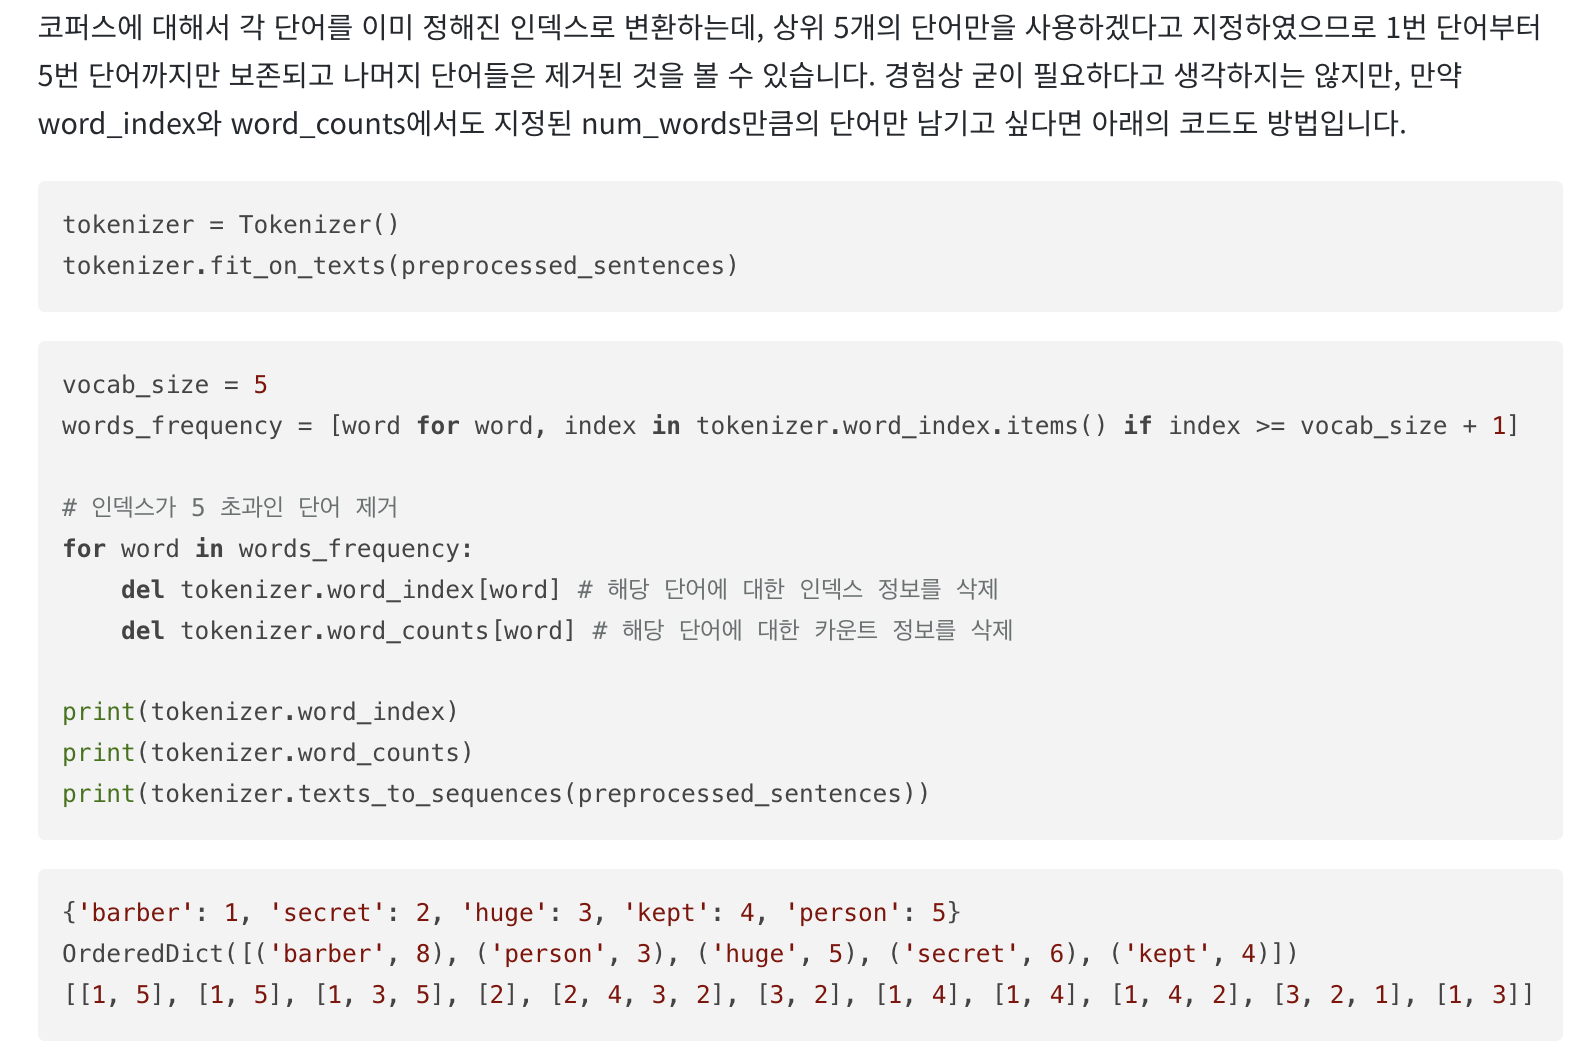

In [ ]:
# 케라스 토크나이저는 OOV(단어 집합에 없는 단어)에 대해서는, 단어를 정수로 바꾸는 과정에서 아예 제거
# 만약 보존하고 싶다면 Tokenzier의 인자 oov_token 사용

vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size +2, oov_token='OOV') #0과 OOV 고려하여 단어 집합의 크기는 +2를 해준다
tokenizer.fit_on_texts(preprocessed_sentences)

In [ ]:
#케라스 토그나이저는 OOV 인덱스르 1로 설정
print('Index of OOV:',tokenizer.word_index['OOV'])

Index of OOV: 1


In [ ]:
# 정수 인코딩
print(tokenizer.texts_to_sequences(preprocessed_sentences))

#빈도수 상위 5개의 단어: 2-6 인덱스
#단어 집합에 없는 단어: OOV 인덱스인 1로 인코딩

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


#7.패딩 (Padding)

> 각 문장(문서)의 길이가 다른 경우, 병렬 연산을 위해 문장의 길이를 임의로 동일하게 맞춰주는 작업
>> 컴퓨터는 길이가 전부 동일한 문서에 대해 하나의 행렬로 보고, 한번에 묶어서 처리 가능!

###1) Numpy로 패딩

In [5]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

#전처리 텍스트
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences) #빈도수를 기반으로 단어 집합 생성

# 학습된 단어 인덱스 출력
print(tokenizer.word_index)
print(tokenizer.word_counts)

print(preprocessed_sentences)
#전처리 텍스트를 정수로 인코딩
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)

print(encoded)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}
OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])
[['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]
[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [6]:
max_len = max(len(item) for item in encoded)
print('최대 길이: ',max_len)

최대 길이:  7


In [8]:
# 모든 분장의 길이를 7로 맞추기 with 가상의 단어 'PAD' (0번)
for sentence in encoded:
  while len(sentence) < max_len: #리스트의 크기가 7보다 작으면 0을 넣어서 7로 맞추어 준다
    sentence.append(0)

padded_np = np.array(encoded)
padded_np

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

* 컴퓨터는 이를 하나의 행렬로 보고, 병렬 처리!
  - 0번 단어는 의미가 없기 때문에 컴퓨터는 자연어 처리 과정에서 0번 단어 무시!

* **패딩: 데이터에 특정 값을 채워서 데이터의 크기(shape)을 조정하는 것!**
  - 숫자 0을 사용하면 제로 패딩

###2) 케라스 전처리 도구로 패딩하기
> pad_sequences()
>> 기본적으로 문서 앞에 0을 채운다
>>> padding='post': 뒤에 0을 채우기

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [11]:
padded = pad_sequences(encoded)
padded

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]], dtype=int32)

In [15]:
padded = pad_sequences(encoded, padding='post')
print(padded)
#결과가 모두 같은지 확인
print((padded == padded_np).all())

[[ 1  5  0  0  0  0  0]
 [ 1  8  5  0  0  0  0]
 [ 1  3  5  0  0  0  0]
 [ 9  2  0  0  0  0  0]
 [ 2  4  3  2  0  0  0]
 [ 3  2  0  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  6  0  0  0  0]
 [ 1  4  2  0  0  0  0]
 [ 7  7  3  2 10  1 11]
 [ 1 12  3 13  0  0  0]]
True


#### 패딩의 기준이 되는 문서의 길이

* maxlen의 인자로 정수를 주면, 길이에 제한을 두고 패딩할 수 있다
  - 문서의 평균 길이가 20인데 문서 1개의 길이가 5,000이라고 모든 문서를 5,000으로 패딩하는 것은 비효율적
  - 기존에 5보다 길었다면 데이터 손실

* 데이터가 손실되는 경우, 앞의 단어가 삭제된다!
  - 뒤의 단어를 삭제하고 싶다면 truncating='post'

In [14]:
padded=pad_sequences(encoded, padding='post',maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]], dtype=int32)

In [16]:
padded=pad_sequences(encoded, padding='post', truncating='post',maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]], dtype=int32)

> 0이 아닌 숫자로 패딩하기
>> pad_sequences의 인자로 value 사용

In [17]:
last_value = len(tokenizer.word_index)+1 #단어 집합의 크기 +1 = 13+1 = 14
padded = pad_sequences(encoded, padding='post', value=last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]], dtype=int32)

#8.One-Hot Encoding

* 컴퓨터는 문자보다 숫자 더 잘 처리
  - 자연어 처리에서는 문자를 숫자로 바꾸는 여러 기법
  - 원-핫 인코딩: 문자를 숫자로 바꾸는 기법 중 단어를 표현하는 가장 기본적 표현 방법
  - GPT: 원핫 인코딩은 정수 인코딩된 값을 이용하여 각 단어를 고유한 벡터로 변환하는 기법

* 단어 집합: 서로 다른 단어들의 집합
  - book != books

* 원-핫 인코딩을 위해서는 단어 집합을 만들어야 한다
  - 1) 단어 집합 만들기 (텍스트의 모든 단어를 중복 허용하지 않고 모아둔 것 = 단어 집합)
  - 2) 단어 집합에 고유한 정수 부여 (=정수 인코딩)
  - 3) 이 숫자로 바뀐 단어를 벡터 처리


###1) 원-핫 인코딩이란?

* 원-핫 인코딩: 단어 집합의 크기를 벡터의 차원으로 하고, 표현하고 싶은 단어의 인덱스에 1의 값 부여, 다른 인덱스에는 0을 부여하는 벡터 표현 방식
  - 이렇게 표현된 벡터를 원-핫 벡터(One-Hot Vector)라고 함

* 원-핫 인코딩 과정
  
  1) 정수 인코딩 진행
  
  2) 표현하고 싶은 단어의 고유한 정수를 인덱스로 간주하고, 해당 위치에 1을 부여하고 다른 단어의 인덱스의 위치에는 0 부여

In [20]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 29.0 MB/s eta 0:00:00


In [21]:
# 한국어 문장의 원-핫 벡터 예시
# "나는 자연어 처리를 배운다"

from konlpy.tag import Okt

okt = Okt()
# 형태소 추출
tokens=okt.morphs('나는 자연어 처리를 배운다')
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


In [25]:
# 각 (형태소) 토큰에 대해 고유한 정수 부여
word_to_index = {word : index for index, word in enumerate(tokens)}
print(word_to_index)
# print(word_to_index[1]) #error occurs!

{'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [26]:
# 토큰을 입력하면 해당 토큰에 대한 원-핫 벡터를 만들어내는 함수

def one_hot_encoding(word,word_to_index):
  one_hot_vector = [0]*(len(word_to_index))  #5
  index = word_to_index[word] #index에 특정 정수 부여
  one_hot_vector[index]=1 #one_hot_vector 리스트의 특정 index에 1 대입
  return one_hot_vector

In [27]:
one_hot_encoding('자연어',word_to_index)

[0, 0, 1, 0, 0, 0]

In [29]:
i = 0
for word in tokens:
  print(one_hot_encoding(word,word_to_index))
  i+=1

[1, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1]


###2) Keras를 이용한 One-Hot Encoding

> 원-핫 인코딩을 수행하는 to_categorical()

In [36]:
#정수 인코딩


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

tokenizer = Tokenizer()
tokenizer.fit_on_texts([text]) #빈도수를 기반으로 단어 집합 생성

#어떤 숫자와 매핑되었는지 .word_index를 통해 확인
print('단어 집합:',tokenizer.word_index)

# .texts_to_sequences(): 정수 시퀀스로 변환(하여 출력)

sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"

encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

단어 집합: {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}
[[2, 5, 1, 6, 3, 7]]


In [38]:
# 케라스 활용 원핫 인코딩: 각각의 (정수) 인코딩 된 결과를 인덱스로 원-핫 인코딩이 수행된 모습

one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


###3) 원-핫 인코딩의 한계

* 단어의 개수가 늘어날수록 벡터를 저장하기 위해 필요한 공간이 계속 늘어남
  - '벡터의 차원이 늘어난다'
  - 비효율성의 문제

* 단어의 유사도를 표현하지 못함
  - 늑대, 호랑이, 강아지, 고양이 4개의 단어 원-핫 인코딩
    - [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1] 원-핫 벡터
    - 늑대와 고양이보다 늑대와 강아지가 유사한데, 이를 표현하지 못함
  - 검색 시스템에서 문제가 될 수 있음

* 문제를 해결하기 위해 단어의 잠재 의미를 반영하여 다차원 공간에 벡터화하는 기법 제시
  - 카운트 기반의 벡터화: LSA (잠재 의미 분석), HAL
  - 예측 기반의 벡터화: NNLM, RNNLM, Word2Vec, FastText
  - 모두 사용: GloVe

#9.Splitting Data (데이터의 분리)

> 지도 학습을 위한 데이터 분리

####1) 지도 학습

* 스팸 분류
  - 20,000개의 데이터 X
  - 20,0000개의 정답 y
  - 훈련 데이터: X_train / y_train
  - 테스트 데이터: X_target / y_target

###2) X와 y분리

#### zip 함수를 이용한 분리

* zip(): 동일한 개수를 가지는 시퀀스 자료형에서, 각 순서에 등장하는 원소들끼리 묶어주는 역할
  - 중첩 리스트의 구성에서 zip 함수는 X와 y를 분리하는데 유용

In [40]:
X, y = zip(['a',1],['b',2],['c',3])
print('X 데이터:',X)
print('y 데이터:',y)

X 데이터: ('a', 'b', 'c')
y 데이터: (1, 2, 3)


In [42]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences) # *는 언팩 연산자
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


#### dataframe을 이용한 분리

In [45]:
import pandas as pd

values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 여부']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 여부
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [46]:
X = df['메일 본문']
y = df['스팸 메일 여부']

In [52]:
print(X)
print()
print(y)
print()
print('X 데이터:',X.to_list())
print('y 데이터:',y.to_list())

0          당신에게 드리는 마지막 혜택!
1      내일 뵐 수 있을지 확인 부탁드...
2      도연씨. 잘 지내시죠? 오랜만입...
3    (광고) AI로 주가를 예측할 수 있다!
Name: 메일 본문, dtype: object

0    1
1    0
2    0
3    1
Name: 스팸 메일 여부, dtype: int64

X 데이터: ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터: [1, 0, 0, 1]


In [55]:
#### Numpy를 이용한 분리
np_array = np.arange(16).reshape((4,4)) #numpy에서는 arange 사용
np_array

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [59]:
X = np_array[:,:3]
y = np_array[:,3]
print(X)
print()
print(y)

[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]

[ 3  7 11 15]


###3) 테스트 데이터 분리하기

> 이미 X와 y가 분리된 데이터에 대해 테스트 데이터를 분리하는 과정

#### 사이킷 런을 이용한 분리
* train_test_split
  - 앞에 있던 샘플이 뒤로 가기도 하고, 데이터의 순서가 전반적으로 섞이면서 분리


In [62]:
from sklearn.model_selection import train_test_split

X,y = np.arange(10).reshape((5,2)), range(5)
print(X)
print()
print(y)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]

range(0, 5)


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)
print(X_train)
print()
print(X_test)

[[2 3]
 [4 5]
 [6 7]]

[[8 9]
 [0 1]]


#### 수동으로 분리

> 데이터가 섞이지 않은 채 어느 지점에서 데이터를 앞과 뒤로 분리
>> 데이터 분리 전에 수동으로 데이터를 섞는 과정 필요할 수 있음!

In [65]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [76]:
num_of_train = int(len(X)*0.8)
num_of_test = int(len(X) - num_of_train) # 소수점을 계산하여 데이터 누락 가능
print(num_of_train)
print(num_of_test)
print()
X_train = X[:num_of_train]
y_train = y[:num_of_train]
X_test = X[num_of_train:]
y_test = y[num_of_train:]

print(X_test)
print()
print(y_test)
print()
print(list(y_test))

9
3

[[18 19]
 [20 21]
 [22 23]]

range(9, 12)

[9, 10, 11]


In [80]:
type(X_train)

numpy.ndarray

In [79]:
type(y_train)

range

In [78]:
type(y_test)

range

In [81]:
new = [2,6,3]
print(y_test+new)

TypeError: unsupported operand type(s) for +: 'range' and 'list'

#10. 한국어 전처리 패키지 (Text Preprocessing Tools for Korean Text)
  - 형태소와 문장 토크나이징 도구: KoNLPy, KSS(Korean Sentence Splitter)
  - 그외의 패키지


###1) PyKoSpacing

* 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환
* 대용량 코퍼스 학습한 딥러닝 모델

In [83]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-qos6ewzh
  Running command git clone --filter=blob:none --quiet https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-qos6ewzh
  Resolved https://github.com/haven-jeon/PyKoSpacing.git to commit b32a889cbd10b006d2f4aba118f0cd5b677e2979
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 69.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 20.5 MB/s eta 0:00:00
  Created wheel for pykospacing: filename=pykospacing-0.5-py3-none-any.whl size=2286918 sha256=2a57cbc89b34964b363e8a1c3236d1331eec4b7c5a9b54378972d847b3fc365b
  S

In [3]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

#띄어쓰기 삭제
new_sent = sent.replace(" ",'')
print(new_sent)

#띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent)

print(sent)
print(kospacing_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


###2) Py_hanspell
* 맞춤법 보정
* 띄어쓰기 보정
* 현재 안된다고 하여 생략

###3) SOYNLP를 이용한 단어 토큰화

* SOYNLP: 품사 태깅, 단어 토큰화를 지원하는 단어 토크나이저
  - 비지도 **학습 기반의 단어 토크나이저**
  - 데이터에 자주 등장하는 단어들을 단어로 분석
  - 내부적 단어 점수 표로 동작하며, 이 점수는
    - 응집 확률(cohension probability) 활용
    - 브랜칭 엔트로피(branching entrophy) 활용

In [5]:
pip install soynlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.8/416.8 kB 2.8 MB/s eta 0:00:00


#### 신조어 문제
* 기존 형태소 분석기의 문제: 신조어나 형태소 분석기에 **등록되지 않은 단어는 제대로 구분하지 못한다**

In [5]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


#### 학습하기
* soynlp는 기본적으로 학습에 기반한 토크나이저이므로, 필요한 한국어 문서를 다운로드해야 함

In [6]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x78786177d750>)

In [7]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

#3만 91개의 문서 존재

30091

In [8]:
# 상위 3개의 문서 출력

i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [9]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 0.826 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


###3) SOYNLP의 응집 확률 (cohesion probability)

* 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도
* 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서,
  - 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값
* 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높음

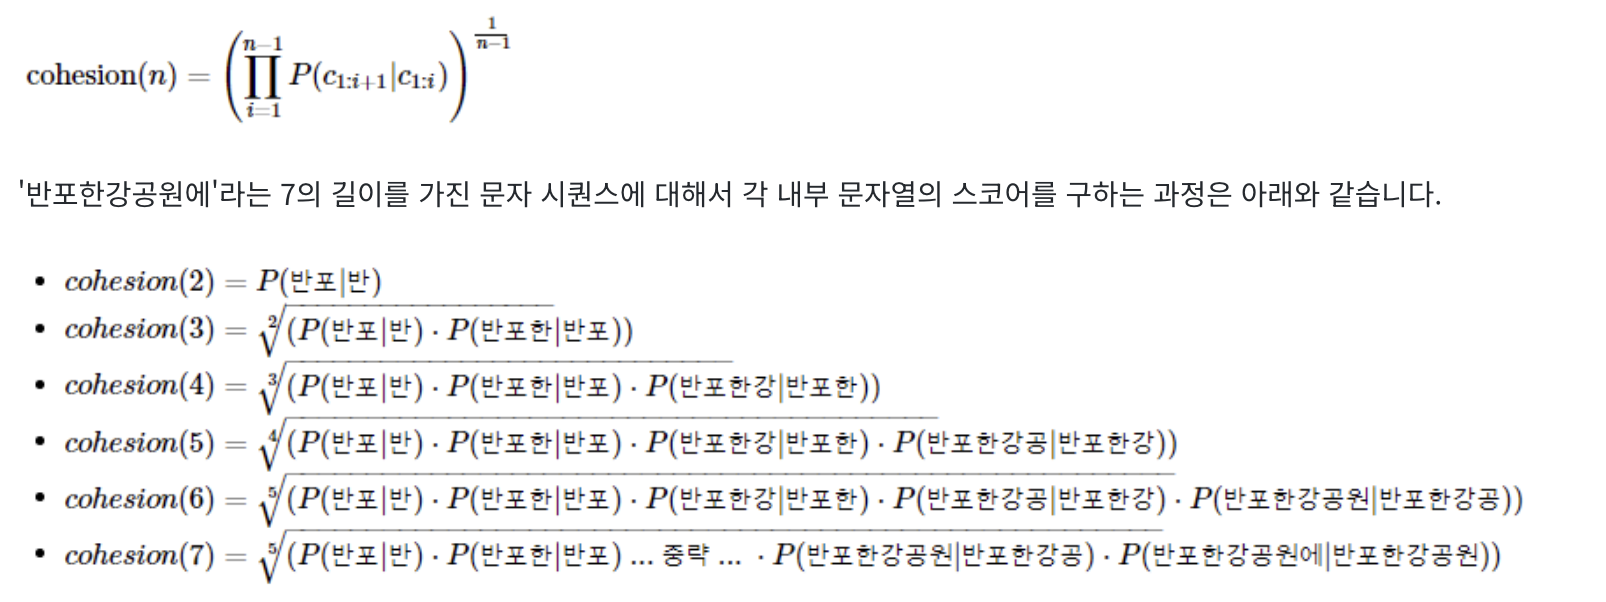

In [13]:
# '반포한'의 응집확률 계산
print(word_score_table['반포한'].cohesion_forward)
print(word_score_table['반포한강'].cohesion_forward)
print(word_score_table['반포한강공'].cohesion_forward)
print(word_score_table['반포한강공원'].cohesion_forward) #가장 높은 응집확률!
#응집도를 통해 판단하기에, 하나의 단어로 판단하기 가장 적합한 문자열은 '반포한강공원'
print(word_score_table['반포한강공원에'].cohesion_forward)

l = []
word = ''
i = 0
for word in '반포한강공원에':
  l.append(word_score_table[word].cohesion_forward)

print(max(l))

0.08838002913645132
0.19841268168224552
0.2972877884078849
0.37891487632839754
0.33492963377557666
0


In [17]:
# '반포한'의 응집확률 계산
print(word_score_table['반포한'].cohesion_forward)
print(word_score_table['반포한강'].cohesion_forward)
print(word_score_table['반포한강공'].cohesion_forward)
print(word_score_table['반포한강공원'].cohesion_forward)  # 가장 높은 응집확률!
print(word_score_table['반포한강공원에'].cohesion_forward)

# 응집도를 통해 판단하기에, 하나의 단어로 판단하기 가장 적합한 문자열은 '반포한강공원'
# 개별 문자에 대한 응집도 확인

print()

# 단어 목록을 리스트로 정의
words = ['반포한', '반포한강', '반포한강공', '반포한강공원', '반포한강공원에']

# 각 단어에 대한 응집확률을 출력
for word in words:
    print(word_score_table[word].cohesion_forward)

0.08838002913645132
0.19841268168224552
0.2972877884078849
0.37891487632839754
0.33492963377557666

0.08838002913645132
0.19841268168224552
0.2972877884078849
0.37891487632839754
0.33492963377557666


###4) SOYNLP의 브랜칭 엔트로피
* Branching Entropy: 확률 분포의 엔트로피값 사용
  - 주어진 문자열에서 다음 문자가 등장할 수 있는지를 판단하는 척도
  - 문자 시퀀스에서 다음 문자 예측에 대한 불확실 정도!
  - 브랜칭 엔트로피 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 더 정확한 예측 가능!
    - 점점 줄어드는 양상

In [20]:
print(word_score_table['디스'].right_branching_entropy)
print(word_score_table['디스플'].right_branching_entropy)
print(word_score_table['디스플레이'].right_branching_entropy)

1.6371694761537934
-0.0


###5) SOYNLP의 L tokenizer

* 한국어의 경우 띄어쓰기 단위로 나눈 어절 토큰은 L토큰 + R토큰의 형식을 가질 때가 많음
  - 공원에 = 공원 + 에
  - 공부하는 = 공부 + 하는
  - L 토크나이저 = L 토큰 + R 토큰으로 나누되, 점수가 가장 높은 L 토큰을 찾아낸다
